# Data Analyst Associate Case Study Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


In [301]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Validation
Describe the validation tasks you performed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

After an exploratory data analysis, I validated the data based on my findings and the provided data dictionary:
1. First, I changed the values of the Product ID column to strings of characters using the astype() method. 
2. Next, I removed the special characters in the Sales column using the str.replace() function and changed the values to numeric using the pd.to_numeric() method. 
3. Then, I examined the unique values of the remaining columns. 
4. I dropped rows that indicate other pet types not included in the analysis using the drop() method. 
5. Lastly, I employed the astype() method to change the values of the Rebuy column to binary and mapped the True/False values to 1/0.

In [302]:
# read csv
df=pd.read_csv("pet_sales.csv")

In [303]:
# eda
df.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


In [305]:
# change product_id from numeric (int) to character (obj)
df['product_id'] = df['product_id'].astype(str)

In [306]:
# check 
df.dtypes

product_id           object
product_category     object
sales                object
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                int64
dtype: object

In [307]:
# remove characters from sales
df['sales'] = df['sales'].str.replace('$','').str.replace(',','')

In [308]:
# check
df.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0
2,4237,Toys,218000,106.34,VC_802,small,hamster,6,0
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0


In [309]:
# change sales from obj to numeric
df['sales'] = pd.to_numeric(df['sales'])

In [310]:
# check
df.dtypes

product_id           object
product_category     object
sales                 int64
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                int64
dtype: object

In [311]:
# list pet_size values
df['pet_size'].unique()

array(['small', 'large', 'extra_small', 'medium', 'extra_large'],
      dtype=object)

In [312]:
# list pet_types values
df['pet_type'].unique()

array(['fish', 'cat', 'hamster', 'dog', 'bird', 'rabbit'], dtype=object)

In [313]:
# drop rows that are not "cat” ,“dog”, “fish”, “bird”
df.drop(df[(df['pet_type'] =='hamster') | (df['pet_type'] =='rabbit')].index, inplace=True)

In [314]:
# check
df['pet_type'].unique()

array(['fish', 'cat', 'dog', 'bird'], dtype=object)

In [315]:
# list ratings - are they all <= 10?
df['rating'].unique()

array([ 7, 10,  1,  8,  9,  3,  6,  5,  4,  2])

In [316]:
# check rebuy column
df['re_buy'].unique()

array([1, 0])

In [317]:
# change rebuy from int to bool
df['re_buy']= df['re_buy'].astype('bool')

In [318]:
# check
df.dtypes

product_id           object
product_category     object
sales                 int64
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                 bool
dtype: object

In [319]:
df.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,True
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,False
3,4364,Snack,69000,241.27,VC_929,large,dog,1,True
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,False
5,4609,Bedding,183000,51.60,VC_1174,large,cat,10,False


In [320]:
# map T/F values to 1/0 
df.re_buy = df.re_buy.replace({True: 1, False: 0})

In [321]:
# final check
df.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0
5,4609,Bedding,183000,51.60,VC_1174,large,cat,10,0


## Data Discovery and Visualization
Describe what you found in the analysis and how the visualizations answer the customer questions in the project brief. In your description you should:
- Include at least two different data visualizations to demonstrate the characteristics of variables
- Include at least one data visualization to demonstrate the relationship between two or more variables
- Describe how your analysis has answered the business questions in the project brief

My findings include:
* The top 3 categories by sales are equipment, snack, and toys - their total is almost half (49%) of the total sales. This is illustrated by the first bar graph.

* Similarly, the top 3 repurchased categories are equipment, snack, and toys. Of the 390 repurchased items for dogs, cats, birds, and fish, 18% of repurchased items were equipment, 15% were snacks, and 15% were toys. They make up almost half (48%) of the repurchased times. This is illustrated by the second bar graph.

* With a correlation coefficient of 0.98, there is a strong positive correlation between sales and repurchases. Hence, the products being purchased again have better sales than others. This is illustrated by the scatterplot and heatmap.

* Although equipment, snack, and toys were commonly repurchased across all pets, medicine was repurchased more than toys for dogs. This is illustrated by m last bar graph. Despite the frequency of medicine repurchases, it would not be a good idea to include medicine in our subscription boxes. Therefore, for all pet boxes, even the dog boxes, snacks, equipment and toys should be included.

In [322]:
# How many products are being purchased more than once? 390
# Do the products being purchased again have better sales than others? based on product categories, yes.
# What products are more likely to be purchased again for different types of pets? equipment, snacks, and toys. for dogs, medicine was also frequently repurchased.

In [323]:
# establish context, style, size
sns.set_style("whitegrid")
sns.set_context("notebook")

In [324]:
# what are the total sales?
df['sales'].sum()

96712000

In [325]:
# which product garners the most sales?
sales_by_cat=df.groupby('product_category')['sales'].sum().sort_values(ascending=False)
sales_by_cat
# top 3 product cat by sales: equipment, snack, toys

product_category
Equipment      16347000
Snack          15965000
Toys           14153000
Medicine        8814000
Supplements     7966000
Food            7449000
Accessory       5791000
Clothes         5362000
Bedding         5236000
Grooming        5131000
Housing         4498000
Name: sales, dtype: int64

In [326]:
# determine % of sales
df['pct_of_sales']=df['sales']/df['sales'].sum()
df

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy,pct_of_sales
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1,0.001272
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0,0.000631
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1,0.000713
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0,0.001427
5,4609,Bedding,183000,51.60,VC_1174,large,cat,10,0,0.001892
...,...,...,...,...,...,...,...,...,...,...
873,4343,Equipment,212000,129.84,VC_908,medium,cat,10,1,0.002192
874,4999,Snack,27000,146.93,VC_1564,medium,bird,6,0,0.000279
876,4783,Snack,162000,224.12,VC_1348,medium,cat,7,1,0.001675
877,4664,Bedding,34000,199.15,VC_1229,large,dog,10,1,0.000352


In [327]:
# check % of sales - do they add up to 1?
df['pct_of_sales'].sum()

1.0

In [328]:
# what % of total dales does each category represent?
sales_pct=df.groupby('product_category')['pct_of_sales'].sum().sort_values(ascending=False)
sales_pct
# the top 3 categories make up almost 50% of all sales

product_category
Equipment      0.169028
Snack          0.165078
Toys           0.146342
Medicine       0.091137
Supplements    0.082368
Food           0.077022
Accessory      0.059879
Clothes        0.055443
Bedding        0.054140
Grooming       0.053054
Housing        0.046509
Name: pct_of_sales, dtype: float64

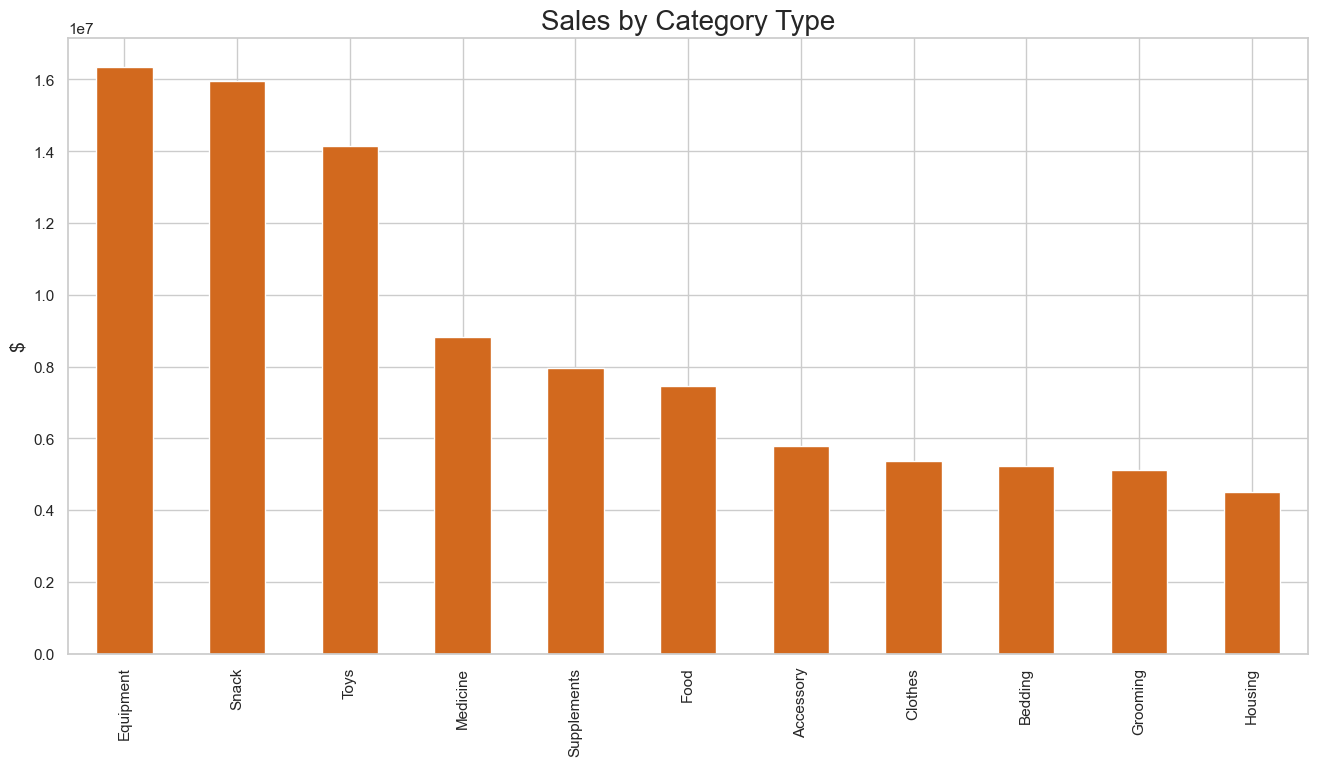

In [329]:
# visualize data in a bar chart
ax=sales_by_cat.plot(kind='bar', color="chocolate")
plt.title("Sales by Category Type", size=20)
plt.xlabel(None)
plt.ylabel("$", size=14)
ax;

In [330]:
# how many repurchased items are there?
df['re_buy'].sum()

390

In [331]:
# what products are being repurchased?
rebuy_count=df.pivot_table(values='re_buy', index='product_category', aggfunc='sum')

In [332]:
# order by rebuy count desc
rebuy_count_sorted=rebuy_count.sort_values(by='re_buy',ascending=False)
rebuy_count_sorted
# 18% of repurchased items were equipment, 15% were snacks, and 15% were toys

,re_buy
product_category,
Equipment,69
Snack,59
Toys,58
Food,37
Medicine,37
Supplements,30
Bedding,24
Accessory,20
Housing,20


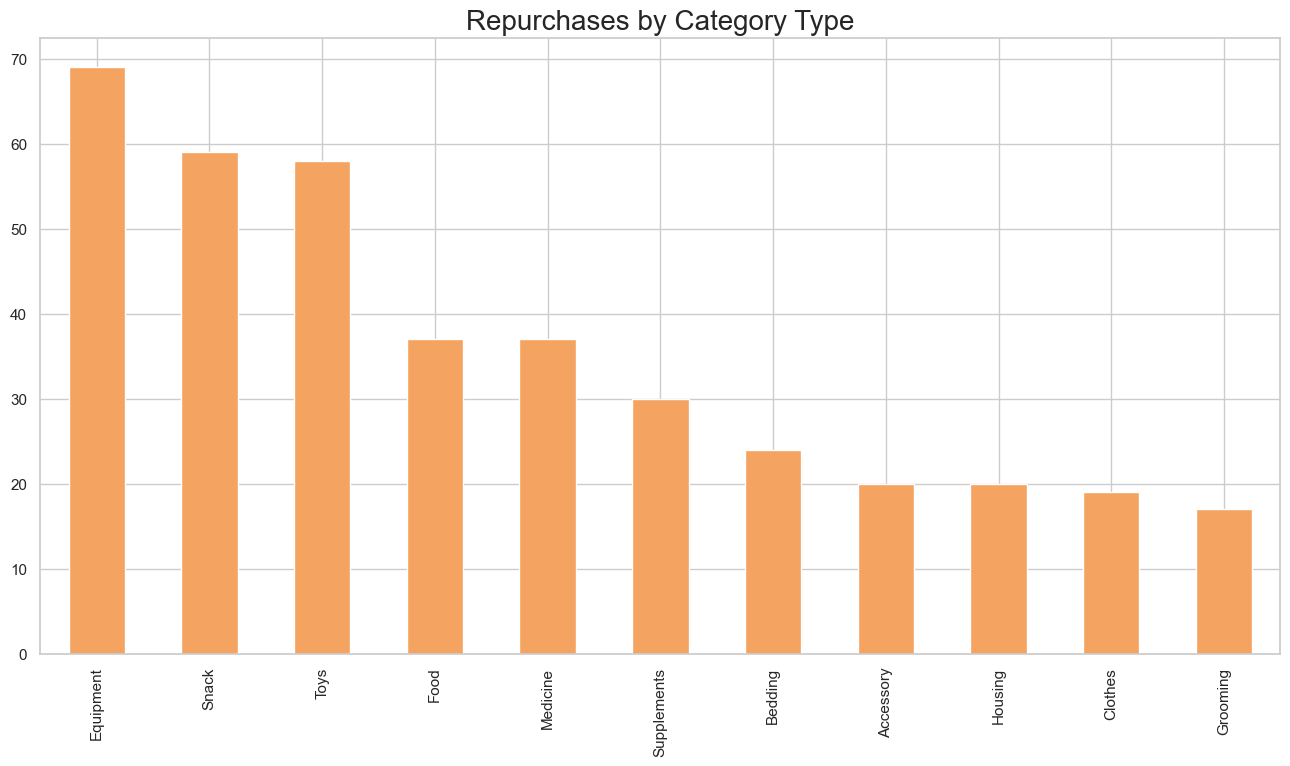

In [333]:
# visualize data in a bar chart
ax=rebuy_count_sorted.plot(kind='bar', color="sandybrown")
plt.title("Repurchases by Category Type", size=20)
plt.xlabel(None)
ax.get_legend().remove()
ax;

In [334]:
# compare sales vs repurchases by product category
sales_v_rebuy=df.pivot_table(values=['sales','re_buy'], index='product_category', aggfunc='sum')

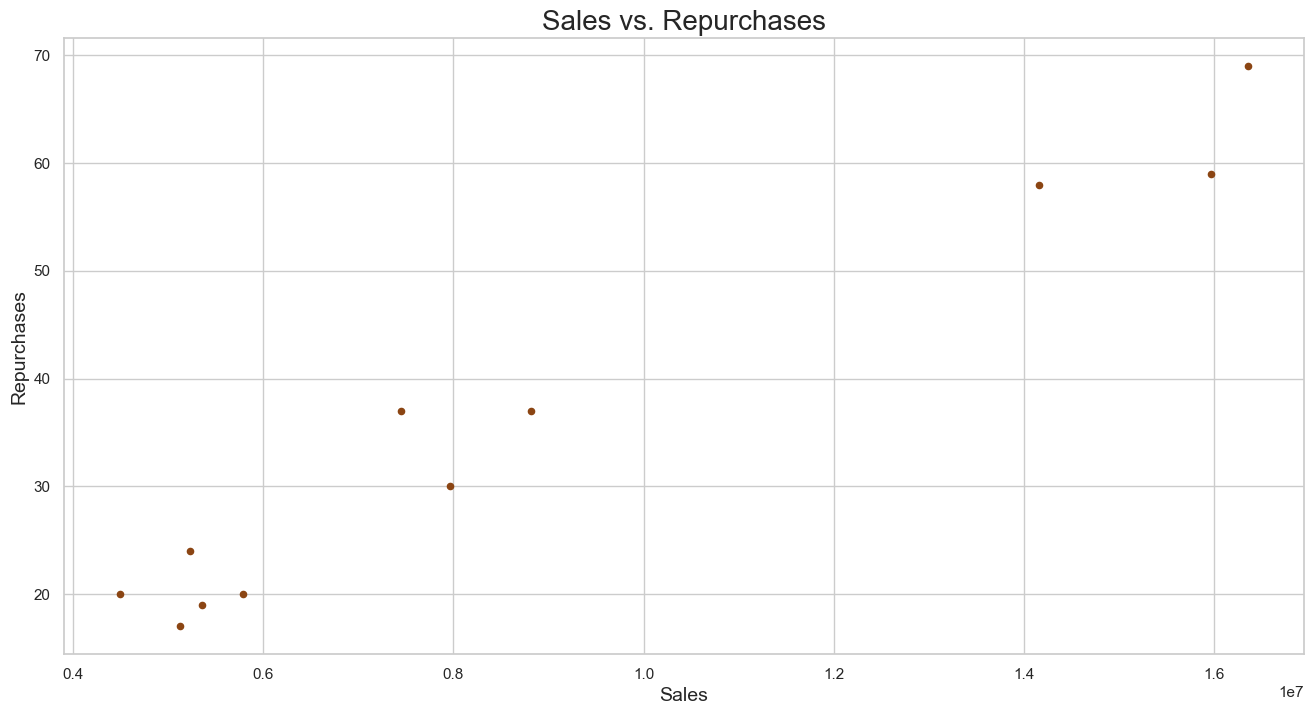

In [335]:
# visualize data in a scatterplot
ax=sales_v_rebuy.plot(x='sales', y='re_buy',kind='scatter', color='saddlebrown')
plt.title("Sales vs. Repurchases", size=20)
plt.xlabel("Sales", size=14)
plt.ylabel("Repurchases", size=14)
ax;
# strong positive correlation

In [336]:
# create correlation dataframe for a heatmap
corr_df = sales_v_rebuy[['sales', 're_buy']].corr()
corr_df

,sales,re_buy
sales,1.000000,0.979775
re_buy,0.979775,1.000000


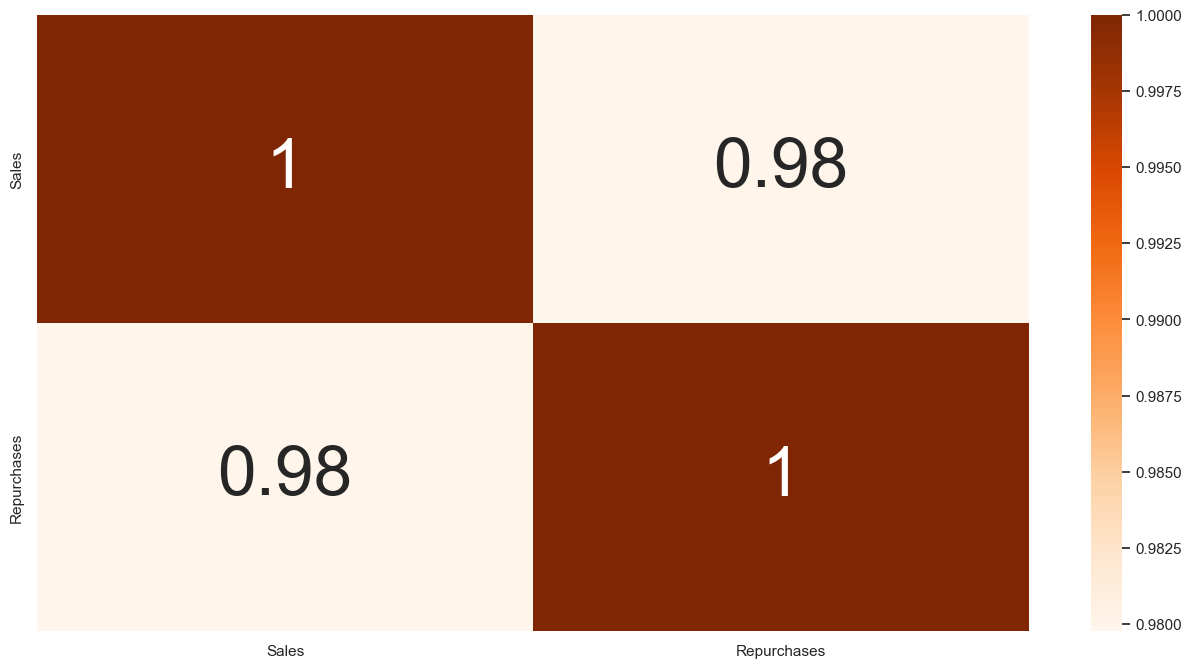

In [337]:
# visualize data in a heatmap
col = ['Sales', 'Repurchases']
hm = sns.heatmap(corr_df, annot = True, annot_kws = {'size':'50'}, xticklabels = col, yticklabels = col, cmap='Oranges')
# correlation coefficient of 0.98 suggests there is a strong positive correlation between sales and repurchases

In [338]:
# how do repurchases vary by pet types?
rebuy_by_pet=df.pivot_table(values='re_buy', index=['pet_type', 'product_category'], aggfunc='sum')

In [339]:
# order by rebuy count desc
rebuy_by_pet_sorted=rebuy_by_pet.sort_values(by=['pet_type','re_buy'],ascending=False)
rebuy_by_pet_sorted
# although equipment, snack, and toys were commonly repurchased across all pets, medicine was repurchased more than toys for dogs
# despite the frequency of medicine repurchases, it would not be a good idea to include medicine in our subscription boxes
# for all pet boxes, even the dog boxes, snacks, equipment and toys should be included

re_buy
pet_type product_category        
fish     Snack                  8
         Equipment              7
         Toys                   7
         Housing                2
         Food                   1
         Medicine               1
         Supplements            1
         Accessory              0
         Bedding                0
         Clothes                0
         Grooming               0
dog      Equipment             28
         Snack                 25
         Medicine              20
         Toys                  19
         Food                  17
         Bedding               14
         Supplements           11
         Accessory             10
         Grooming              10
         Clothes                8
         Housing                8
cat      Equipment             27
         Toys                  25
         Snack                 19
         Food                  18
         Supplements           17
         Medicine              15
         Clothes               10
         Accessory              9
         Bedding                9
         Housing                9
         Grooming               7
bird     Equipment              7
         Snack                  7
         Toys                   7
         Accessory              1
         Bedding                1
         Clothes                1
         Food                   1
         Housing                1
         Medicine               1
         Supplements            1
         Grooming               0

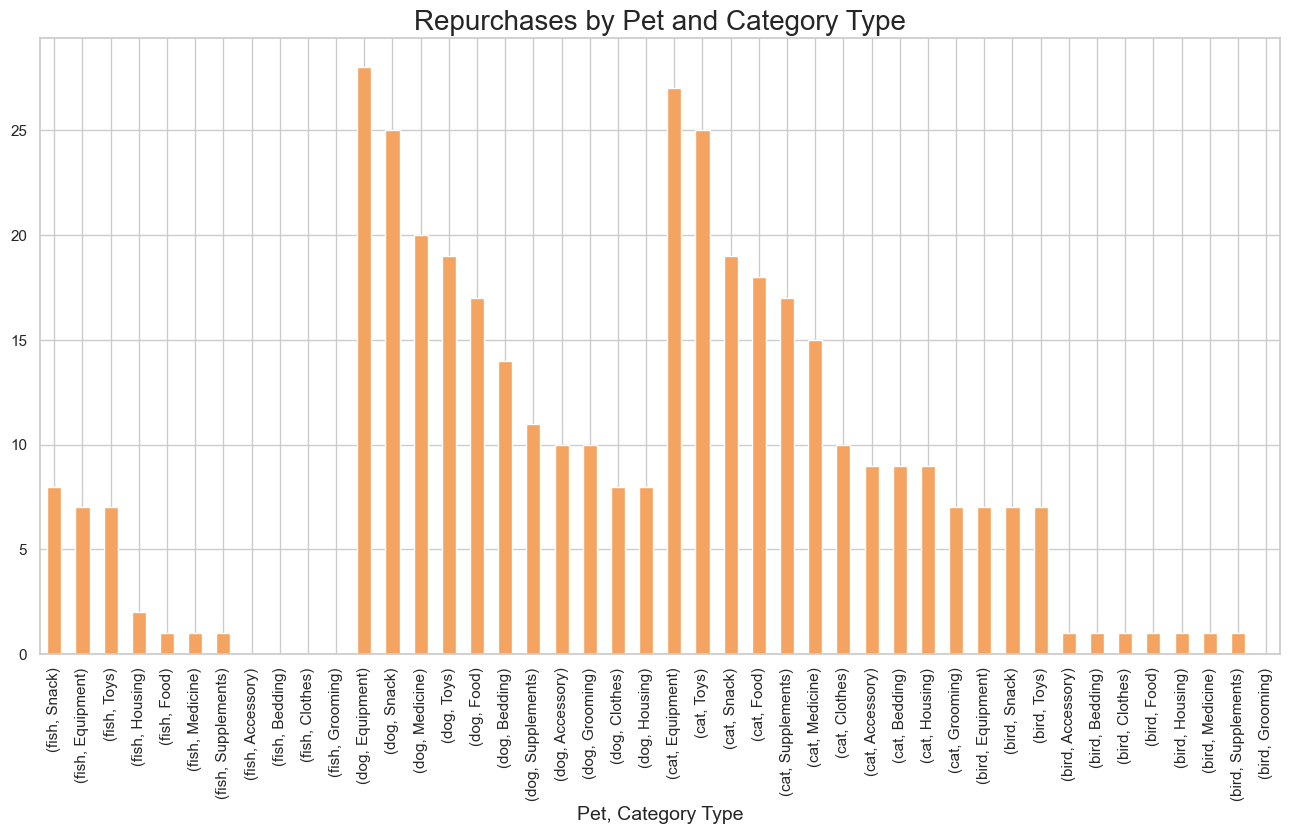

In [340]:
# visualize data in a bar graph
ax=rebuy_by_pet_sorted.plot(kind='bar', color='sandybrown')
plt.title("Repurchases by Pet and Category Type", size=20)
plt.xlabel("Pet, Category Type", size=14)
ax.get_legend().remove()
ax;

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study